In [4]:
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
a = np.tile([1, 2, 3, 4], (4, 1))
a += np.arange(4).reshape(-1, 1)
for line in a:
	print(line)

[1 2 3 4]
[2 3 4 5]
[3 4 5 6]
[4 5 6 7]


In [9]:
torch.unsqueeze(torch.tensor([1, 2, 4]), 1).shape

torch.Size([3, 1])

In [8]:

hidden_channels= 5 * [6]
hidden_channels.append(7)
hidden_channels

[6, 6, 6, 6, 6, 7]

In [3]:
a = [1 for _ in range(1)]
a

[1]

In [6]:
arr = np.array([1, 2, 4, 4])
print(np.sum([arr == np.max(arr)]))


2


In [2]:
from algorithms import faulty_stochastic_opt

In [11]:
ideal_labels = np.array([
	[1, 0, 0],
	[0, 1, 0],
	[0, 1, 0],
	[0, 0, 1],
])
faulty_stochastic_opt(ideal_labels, 0.5, np.random.default_rng(2))

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [2]:
test = np.arange(6)
elems = [1, 2, 2, 4]
test[elems]

array([1, 2, 2, 4])

0.25


array([[0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

k:  5


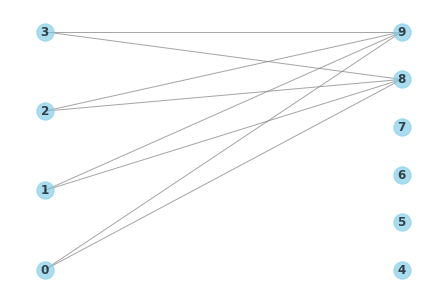

In [42]:
from instance_generator import _sample_partitioned_graph

rng = np.random.default_rng(10)
p = 1
m = 4
n = 6
size = 2
eps = 0

kwargs = {'p': p, 'size': size, 'eps': eps}

adj = _sample_partitioned_graph(m, n, rng, **kwargs)
mat = np.zeros((m+n, m+n))
mat[:m, -n:] = adj
mat[-n:, :m] = adj.T

# Create a graph from the adjacency matrix
graph = nx.Graph(mat)

# Draw the graph
# pos = nx.spring_layout(graph)  # You can choose different layout algorithms
pos = nx.bipartite_layout(graph, np.arange(m))  # You can choose different layout algorithms
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray', alpha=0.7)
# plt.savefig(f"data/sparse_er_eps_{eps}.png")
plt.show()

{0: array([0.95600171, 0.20768181]), 1: array([0.82844489, 0.14928212]), 2: array([0.51280462, 0.1359196 ]), 3: array([0.68903648, 0.84174772]), 4: array([0.425509, 0.956926]), 5: array([0.82533291, 0.33821531]), 6: array([0.57576055, 0.75330186]), 7: array([0.82710394, 0.93343847]), 8: array([0.14499469, 0.74558021]), 9: array([0.13935139, 0.90652876]), 10: array([0.22611443, 0.85323975]), 11: array([0.30631787, 0.96983037]), 12: array([0.51783421, 0.32247456]), 13: array([0.28243352, 0.605865  ]), 14: array([0.33376446, 0.67864877]), 15: array([0.15442507, 0.24977552]), 16: array([0.86989425, 0.60036782]), 17: array([0.26198306, 0.1494149 ]), 18: array([0.13678915, 0.24892094]), 19: array([0.38282467, 0.64907906]), 20: array([0.83756376, 0.77603195]), 21: array([0.33951558, 0.14856874]), 22: array([0.45701939, 0.43786436]), 23: array([0.57421759, 0.37326922])}


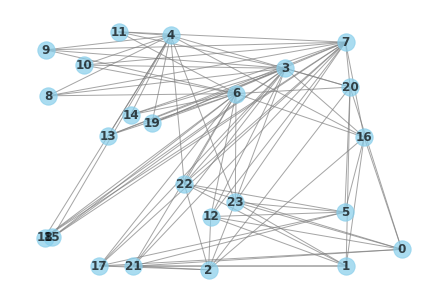

In [59]:
# visualize the FEAT graphs
from instance_generator import _sample_feature_bipartite_graph
rng = np.random.default_rng(10)
kwargs = {
	  'q': 0.3,
	  'ret_features': True
	}

m = 8
n = 16

adj, M, N = _sample_feature_bipartite_graph(m, n, rng, **kwargs)
mat = np.zeros((m+n, m+n))
mat[:m, -n:] = adj
mat[-n:, :m] = adj.T

graph = nx.Graph(mat)

positions = np.vstack([M[:, :2], N[:, :2]])
pos = {node: positions[node] for node in range(m+n)}
print(pos)
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray', alpha=0.7)
# plt.savefig(f"data/FEAT_dot_prod_2d_no_rating.png")
plt.show()